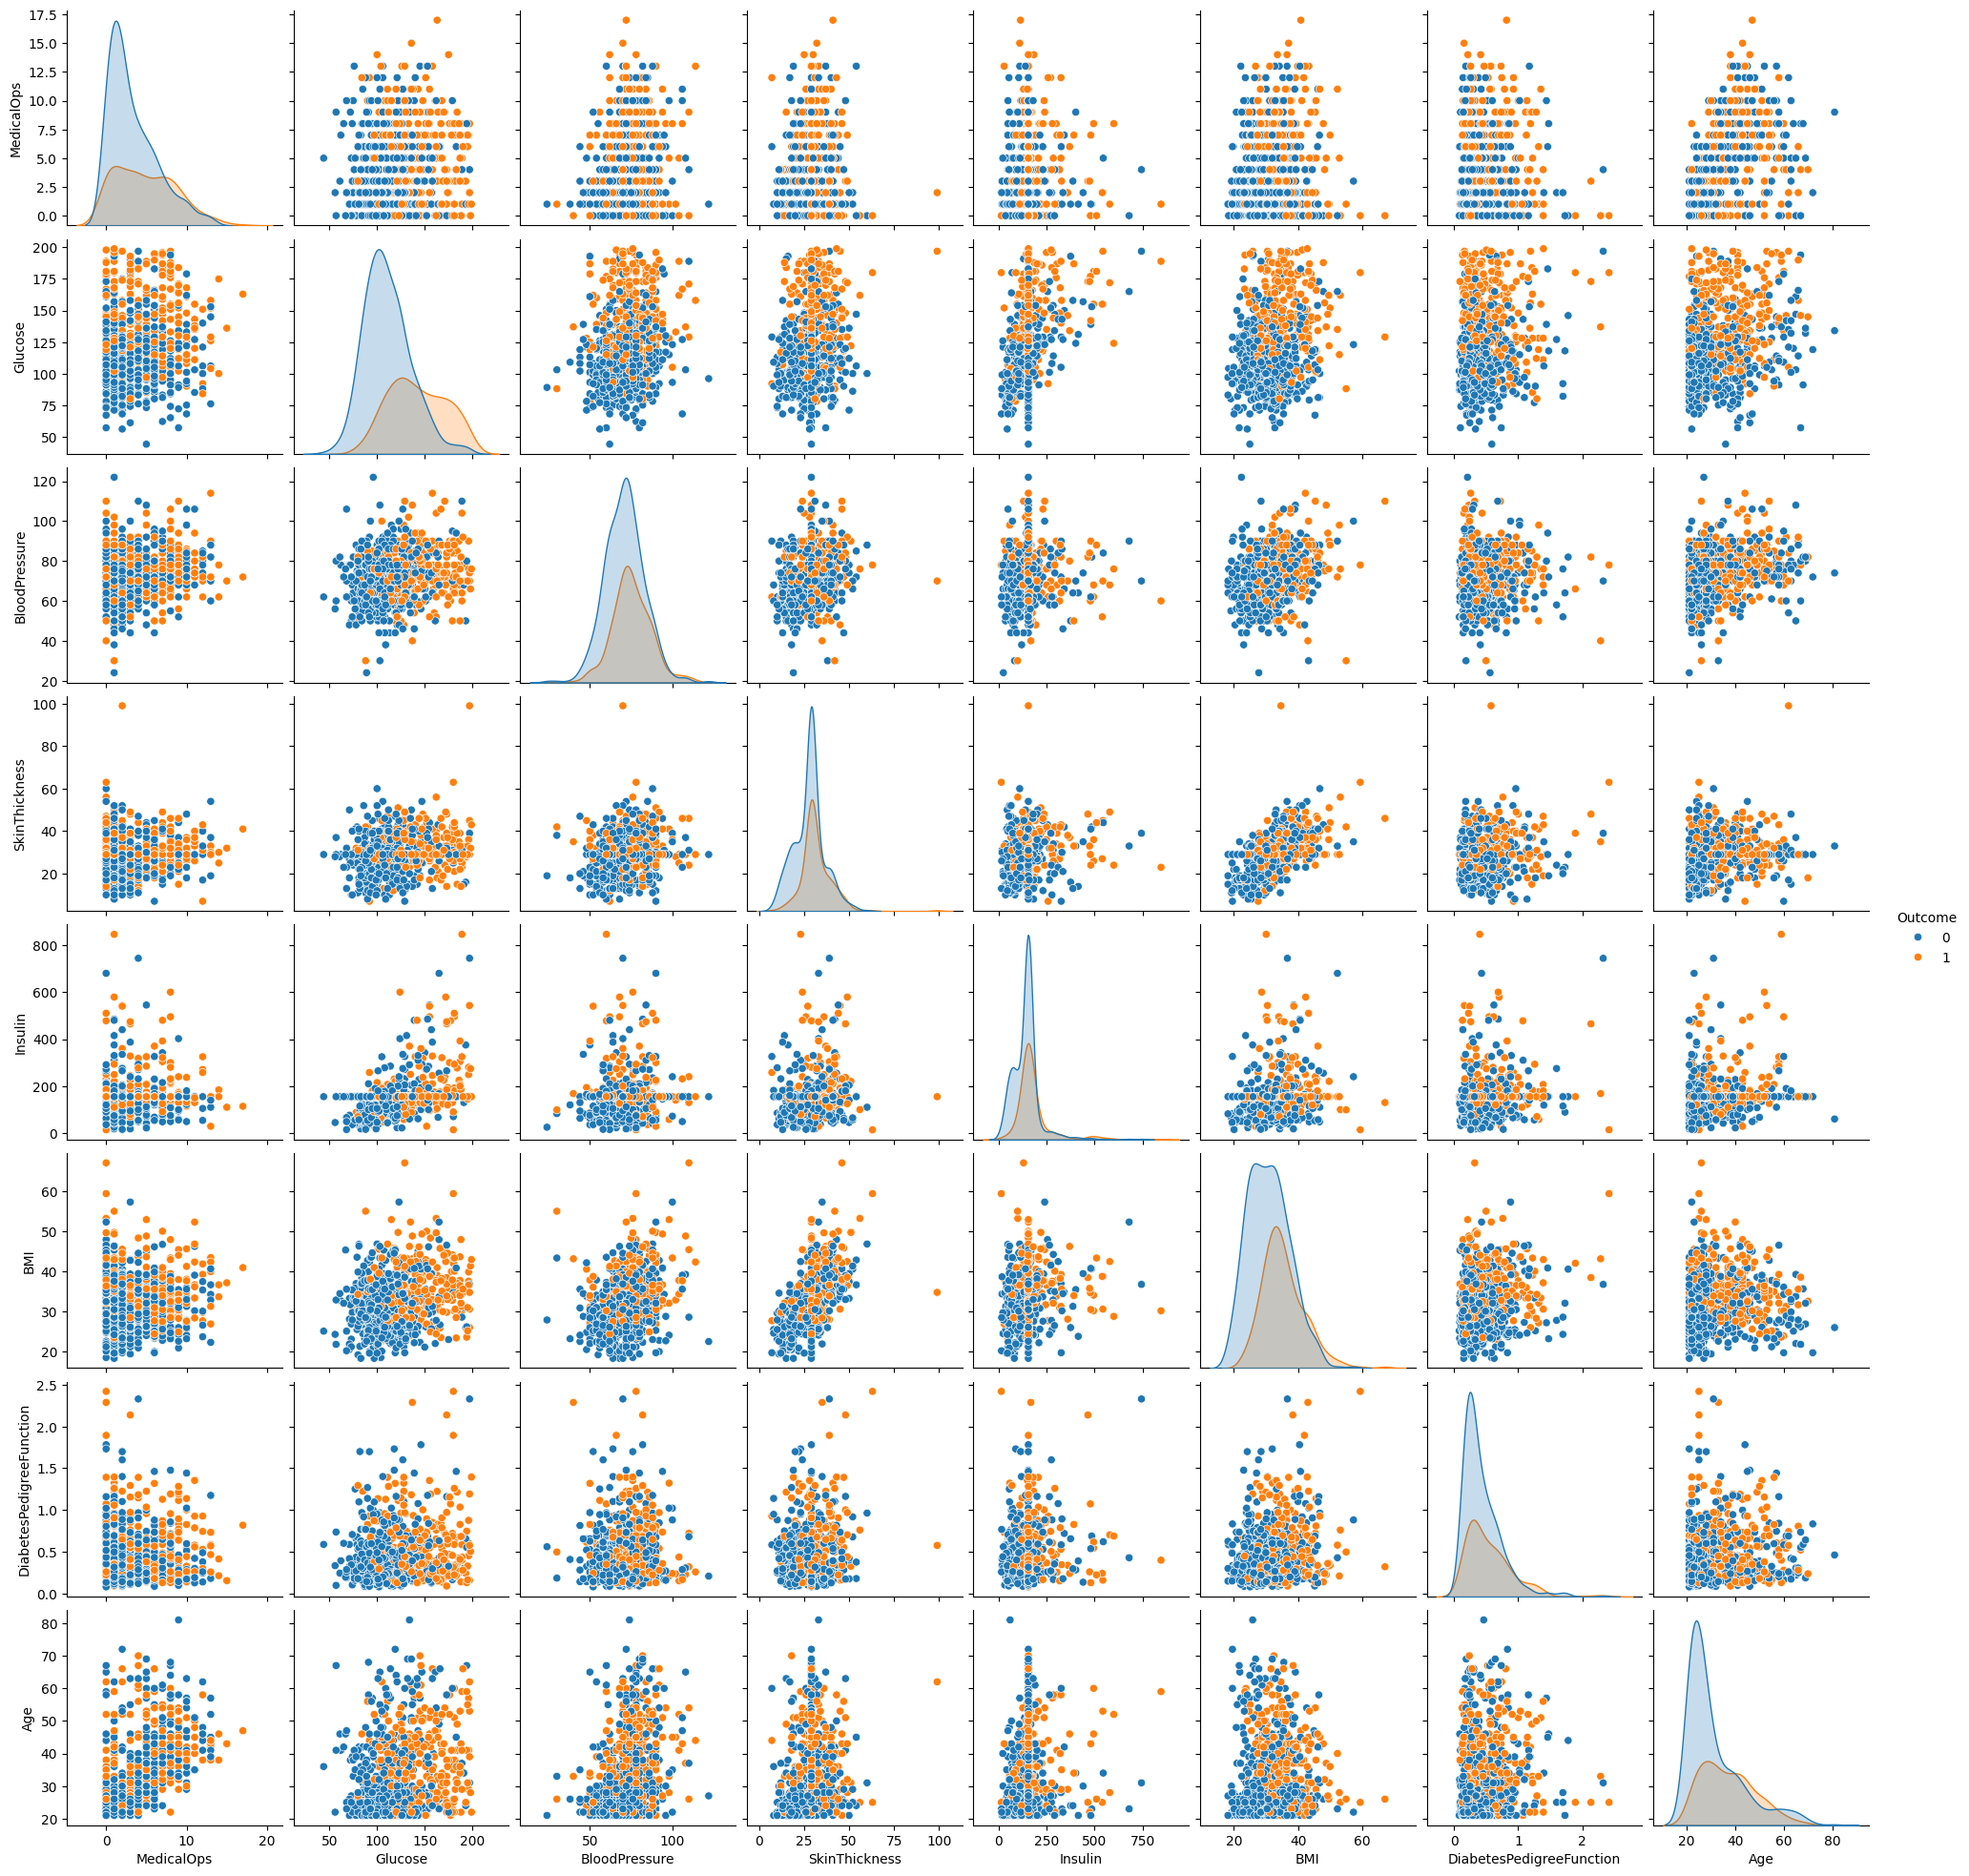

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Load the dataset
data = pd.read_csv('C:\\Users\\Laiba\\Desktop\\AI-lab\\Lab9\\diabetes.csv')

# Convert all columns to numeric
data = data.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replace zero values with NaN in certain columns
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for col in zero_not_accepted:
    data[col] = data[col].replace(0, np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN, mean)

sns.pairplot(data, hue='Outcome')


In [ ]:
# Split features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def KNNClassifier(X_train, X_test, y_train, k):
    y_pred = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distances.append(euclidean_distance(test_point, train_point))

        sorted_indices = np.argsort(distances)[:k]
        
        k_nearest_labels = [y_train[i] for i in sorted_indices]
        
        prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
        y_pred.append(prediction)
    return y_pred

# Define k for KNN
k = 5

# Predict labels using KNN
y_pred = KNNClassifier(X_train, X_test, y_train, k)
print("Predicted labels:", y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Predicted labels: [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
Accuracy: 0.7402597402597403


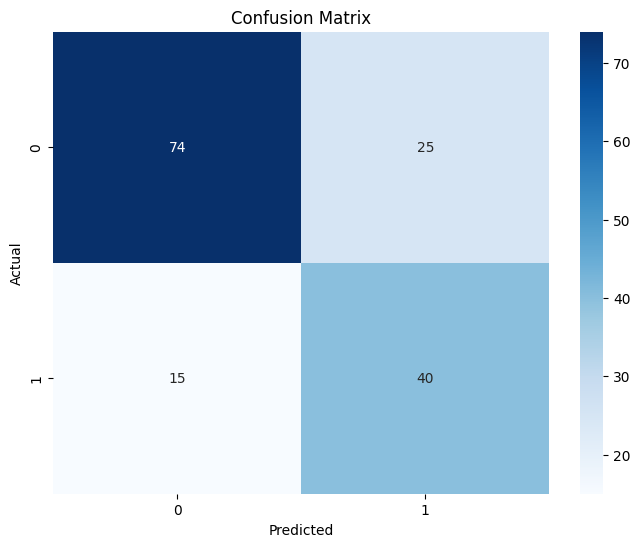

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()